In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seaborn style
sns.set(style="whitegrid")

In [36]:
# Path to your CSV file
file_path = "../Files/merged_trackman_games.csv"

# Load CSV
df = pd.read_csv(file_path)

# Normalize pitcher names (trim + lowercase)
df["Pitcher"] = df["Pitcher"].str.strip().str.lower()

# Optional: check columns
print("Columns in CSV:", df.columns)

Columns in CSV: Index(['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher',
       'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter',
       ...
       'ThrowTrajectoryZc1', 'ThrowTrajectoryZc2', 'PitchReleaseConfidence',
       'PitchLocationConfidence', 'PitchMovementConfidence',
       'HitLaunchConfidence', 'HitLandingConfidence',
       'CatcherThrowCatchConfidence', 'CatcherThrowReleaseConfidence',
       'CatcherThrowLocationConfidence'],
      dtype='object', length=166)


In [49]:
def plot_pitcher_heatmaps(df, pitcher_name):
    """
    Plots heatmaps of pitch locations for all pitch types for a single pitcher,
    with a true strike zone rectangle.
    """
    pitcher_name_clean = pitcher_name.strip().lower()
    pitcher_data = df[df["Pitcher"] == pitcher_name_clean]

    if pitcher_data.empty:
        print(f"No data found for pitcher: {pitcher_name}")
        return

    pitch_types = pitcher_data["TaggedPitchType"].unique()
    n_pitches = len(pitch_types)

    n_cols = 2
    n_rows = math.ceil(n_pitches / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
    axes = axes.flatten()

    strike_left = -0.7083
    strike_right = 0.7083
    strike_bottom = 1.5
    strike_top = 3.5

    for i, pitch in enumerate(pitch_types):
        pitch_data_type = pitcher_data[pitcher_data["TaggedPitchType"] == pitch]

        # KDE heatmap
        sns.kdeplot(
            x=pitch_data_type["PlateLocSide"],
            y=pitch_data_type["PlateLocHeight"],
            fill=True,
            cmap="coolwarm",
            bw_adjust=0.5,
            levels=100,
            thresh=0,
            ax=axes[i]
        )

        # Add strike zone rectangle
        rect = plt.Rectangle(
            (strike_left, strike_bottom),
            strike_right - strike_left,
            strike_top - strike_bottom,
            linewidth=2,
            edgecolor="black",
            facecolor="none"
        )
        axes[i].add_patch(rect)

        # Titles and labels
        axes[i].set_title(f"{pitcher_name} - {pitch}", fontsize=12)
        axes[i].set_xlabel("Horizontal Location (ft)")
        axes[i].set_ylabel("Vertical Location (ft)")

        # Optional: set axes limits
        axes[i].set_xlim(-2, 2)
        axes[i].set_ylim(0, 5)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

/var/folders/1g/81_0v8_j60b77zl9p9ky8l_40000gn/T/ipykernel_19877/2355936185.py:31: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/1g/81_0v8_j60b77zl9p9ky8l_40000gn/T/ipykernel_19877/2355936185.py:31: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


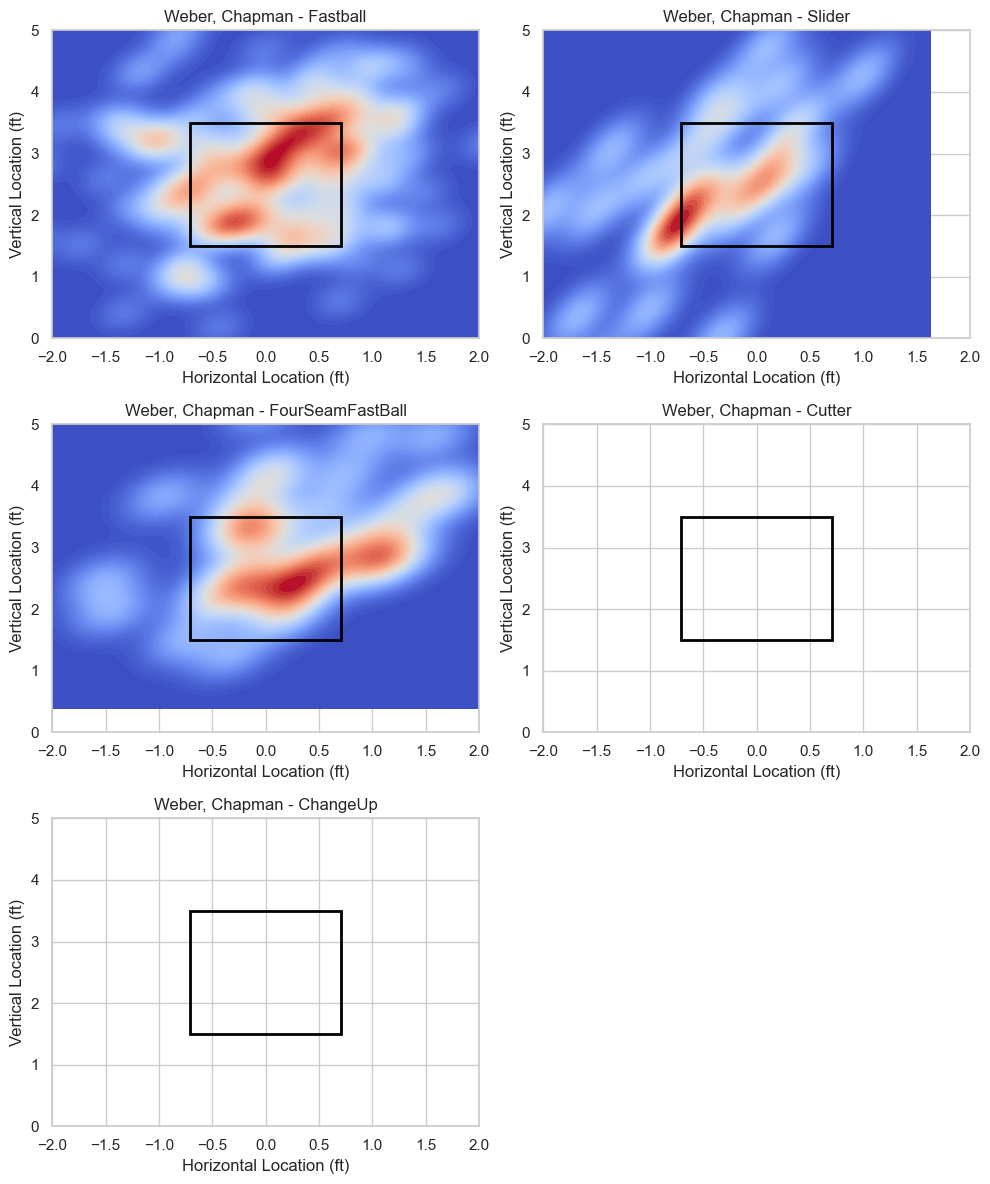

In [52]:
pitcher_to_plot = "Weber, Chapman"
plot_pitcher_heatmaps(df, pitcher_to_plot)